# Lab 1: Exploring languages through word frequencies

## Learning Objectives:
In this lab you will learn the following linguistic concepts and programming skills:
* Basic text processing and regular expressions.
* What do word frequencies tell us about a language?
* How do different languages compare?
* How to manipulate corpora and plot insightful graphs?

## About this assignment

- This is a Jupyter notebook. You can execute cell blocks by pressing control-enter.
- You will be submitting the lab1.py file on Gradescope.
- We have provided local access to the Gradescope autograder test cases. In order to run the test cases locally, simply run <code>python run_tests.py</code> or <code>python run_tests.py -j</code> (this commands gives information about the performance on each test case in the form of a readable json object).

## Pre-requisites:
For this lab, you need to make sure you have the following installed:
* python3.6 (python2.7 should also work)
* nltk (python package)
* matplotlib

To make sure your installation is successful, execute the block below.

In [1]:
import nltk
import matplotlib
import importlib

In [2]:
import lab1

As a packaged solution, I would recommend installing [conda](https://docs.conda.io/en/latest/miniconda.html), and creating a conda [environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) 'ece365_nlp' to use for the rest of this module.

## Exercise 1: Working With Text

Before getting started, let's work with some simple text processing! 

In [3]:
text1 = "Ethics are built right into the ideals and objectives of the United Nations "

len(text1) # The length of text1 (String Length)

76

In [4]:
text2 = text1.split(' ') # Return a list of the words in text2, separating by ' '.
len(text2) # Word Length

14

In [5]:
text2

['Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations',
 '']

<br>
List comprehension allows us to find specific words:

In [6]:
[w for w in text2 if len(w) > 3] # Words that are greater than 3 letters long in text2

['Ethics',
 'built',
 'right',
 'into',
 'ideals',
 'objectives',
 'United',
 'Nations']

In [7]:
[w for w in text2 if w.istitle()] # Capitalized words in text2

['Ethics', 'United', 'Nations']

In [8]:
[w for w in text2 if w.endswith('s')] # Words in text2 that end in 's'

['Ethics', 'ideals', 'objectives', 'Nations']

<br>
We can find unique words using 'set()'.

In [9]:
text3 = 'To be or not to be'
text4 = text3.split(' ')

len(text4)

6

In [10]:
len(set(text4))

5

In [11]:
set(text4)

{'To', 'be', 'not', 'or', 'to'}

In [12]:
len(set([w.lower() for w in text4])) # .lower converts the string to lowercase.

4

In [13]:
set([w.lower() for w in text4])

{'be', 'not', 'or', 'to'}

### Processing free-text

In [14]:
text5 = '"Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'
text6 = text5.split(' ')

text6

['"Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations"',
 '#UNSG',
 '@',
 'NY',
 'Society',
 'for',
 'Ethical',
 'Culture',
 'bit.ly/2guVelr']

<br>
Finding hastags:

In [15]:
[w for w in text6 if w.startswith('#')]

['#UNSG']

<br>
Finding callouts:

In [16]:
[w for w in text6 if w.startswith('@')]

['@']

In [17]:
text7 = '@UN @UN_Women "Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'
text8 = text7.split(' ')
[w for w in text8 if w.startswith('@')]

['@UN', '@UN_Women', '@']

### Regular Expressions

We can use regular expressions to help us with more complex parsing. A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Regular expressions are widely used in UNIX world.

For example `'@[A-Za-z0-9_]+'` will return all words that: 
* start with `'@'` and are followed by at least one: 
* capital letter (`'A-Z'`)
* lowercase letter (`'a-z'`) 
* number (`'0-9'`)
* or underscore (`'_'`)

In [18]:
import re # import re - a module that provides support for regular expressions

[w for w in text8 if re.search('@[A-Za-z0-9_]+', w)]

['@UN', '@UN_Women']

Let's get more familiar with Regular Expression on pandas (pandas is a powerful open source data analysis Python tool.)!

In [19]:
import pandas as pd

time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])
df

,text
0,Monday: The doctor's appointment is at 2:45pm.
1,Tuesday: The dentist's appointment is at 11:30...
2,"Wednesday: At 7:00pm, there is a basketball game!"
3,Thursday: Be back home by 11:15 pm at the latest.
4,"Friday: Take the train at 08:10 am, arrive at ..."


In [20]:
# find the number of characters for each string in df['text']
df['text'].str.len()

0    46
1    50
2    49
3    49
4    54
Name: text, dtype: int64

In [21]:
# find the number of tokens for each string in df['text']
df['text'].str.split().str.len()

0     7
1     8
2     8
3    10
4    10
Name: text, dtype: int64

In [22]:
# find which entries contain the word 'appointment'
df['text'].str.contains('appointment')

0     True
1     True
2    False
3    False
4    False
Name: text, dtype: bool

In [23]:
# find how many times a digit occurs in each string
df['text'].str.count(r'\d')

0    3
1    4
2    3
3    4
4    8
Name: text, dtype: int64

In [24]:
# find all occurances of the digits
df['text'].str.findall(r'\d')

0                   [2, 4, 5]
1                [1, 1, 3, 0]
2                   [7, 0, 0]
3                [1, 1, 1, 5]
4    [0, 8, 1, 0, 0, 9, 0, 0]
Name: text, dtype: object

In [25]:
# group and find the hours and minutes
df['text'].str.findall(r'(\d?\d):(\d\d)')

0               [(2, 45)]
1              [(11, 30)]
2               [(7, 00)]
3              [(11, 15)]
4    [(08, 10), (09, 00)]
Name: text, dtype: object

In [26]:
# replace weekdays with '???'
df['text'].str.replace(r'\w+day\b', '???')

C:\Users\achan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0          ???: The doctor's appointment is at 2:45pm.
1       ???: The dentist's appointment is at 11:30 am.
2          ???: At 7:00pm, there is a basketball game!
3         ???: Be back home by 11:15 pm at the latest.
4    ???: Take the train at 08:10 am, arrive at 09:...
Name: text, dtype: object

In [27]:
# replace weekdays with 3 letter abbrevations
df['text'].str.replace(r'(\w+day\b)', lambda x: x.groups()[0][:3])

C:\Users\achan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0          Mon: The doctor's appointment is at 2:45pm.
1       Tue: The dentist's appointment is at 11:30 am.
2          Wed: At 7:00pm, there is a basketball game!
3         Thu: Be back home by 11:15 pm at the latest.
4    Fri: Take the train at 08:10 am, arrive at 09:...
Name: text, dtype: object

In [28]:
# create new columns from first match of extracted groups
df['text'].str.extract(r'(\d?\d):(\d\d)')

,0,1
0,2,45
1,11,30
2,7,00
3,11,15
4,08,10


In [29]:
# extract the entire time, the hours, the minutes, and the period
df['text'].str.extractall(r'((\d?\d):(\d\d) ?([ap]m))')

0   1   2   3
  match                      
0 0        2:45pm   2  45  pm
1 0      11:30 am  11  30  am
2 0        7:00pm   7  00  pm
3 0      11:15 pm  11  15  pm
4 0      08:10 am  08  10  am
  1       09:00am  09  00  am

In [30]:
# extract the entire time, the hours, the minutes, and the period with group names
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

time hour minute period
  match                             
0 0        2:45pm    2     45     pm
1 0      11:30 am   11     30     am
2 0        7:00pm    7     00     pm
3 0      11:15 pm   11     15     pm
4 0      08:10 am   08     10     am
  1       09:00am   09     00     am

You may realize there is nothing for you to answer. This section is ungraded, but you are strongly recommended to read&understand this section before moving on. 

## Exercise 2: Word Frequencies

We live in a multi-lingual world. The languages we use are like English in some ways and distinct from English in many ways. In this exercise, we will explore some aspects of languages that make them different from English by the use of quantitative indices. 

Before we begin comparing languages, let us begin with English. How many words are there in English? Well, that depends on who we ask. The Second Edition of the 20-volume Oxford English Dictionary contains full entries for 171,476 words in current use (and 47,156 obsolete words). Looking elsewhere, Webster's Third New International Dictionary, Unabridged, together with its 1993 Addenda Section, includes some 470,000 entries. But, the number of words in the Oxford and Webster Dictionaries are not the same as the number of words in English. Why is that? First, it takes a while for dictionary publishers like Oxford University and Merriam-Webster to include new words in their dictionaries. While it may seem surprising new words are being coined at a rapid rate, a recent article in The Guardian reports that English speakers are adding new words at the rate of around 1,000 a year. Recent dictionary debutants include blog, grok, crowdfunding, hackathon, airball, e-marketing, sudoku, twerk and Brexit, many of which are words we find in use in our everyday lives. Slang and jargon could also be considered in this list. You have probably observed how some of these terms depend on where you live (e.g., 'prepone' in India means the opposite of postpone), whereas others are common in many places (e.g. the portmanteau, brunch = breakfast + lunch).

A natural question that arises in this setting is, are all words equally likely, or do they occur with different frequencies? As you can expect, words occur with different frequencies, but what you would would not have expected is how skewed the word frequencies can be. That is what you will see in your first exercise. 

First, you will count the frequency of words from a word list derived from a large collection of words -- a 'corpus' (meaning 'a body of text'). For this part of the exercise, you will use the corpus of Reuters from which you will count the number of times each word occurs.
                                                                                                                     For this, you will need to do some tokenization. Towards that, you will lowercase all words, remove the punctuation marks and numbers. Then you will use NLTK to get the frequency distribution of the tokenized text.
                                                                                                                     
Based on the frequency distribution of word that you will collect, you will answer the following questions.

* What are the 10 most frequent words?
* What are the 10 least frequent words?
* What proportion of words have a frequency of 1? These singleton words are termed 'hapax legomena' (a sophisticated Greek name) and the numebr of singletons in a corpus is a measure of the richness of the vocabulary of that collection, giving you the rate at which new words appear in that text. If you take a very large text in a language and call it representative of that language, then the rate of singletons is a measure of its richness.
* What are the answers to the above questions, if we consider stemming or lemmatization? 

**Total points: 50 points**

### Coding Questions

a. In the lab1.py file, complete the function "get_freqs" that takes as an input the "Reuters" corpus (type str) from nltk and returns as an output a dictionary with the key being a word, and the value being the frequency of the word in the corpus.
Make sure to lowercase all words in the corpus and to replace all punctuations and digits with a space character. This will take care of tokenization for you. To avoid confusion, the list of punctuation marks are given to you. (15 points)

In [31]:
puncts = ['.','!','?',',',';',':','[', ']', '{', '}', '(', ')', "\'", '\"']

In [32]:
importlib.reload(lab1)

raw_corpus = nltk.corpus.reuters.raw()

freqs = lab1.get_freqs(raw_corpus, puncts)

In [33]:
freqs

{'asian': 63,
 'exporters': 255,
 'fear': 51,
 'damage': 141,
 'from': 8217,
 'u': 6316,
 's': 15601,
 '-japan': 22,
 'rift': 3,
 'mounting': 22,
 'trade': 3059,
 'friction': 29,
 'between': 1076,
 'the': 69246,
 'and': 25617,
 'japan': 1836,
 'has': 4864,
 'raised': 351,
 'fears': 80,
 'among': 290,
 'many': 349,
 'of': 36749,
 'asia': 69,
 'exporting': 68,
 'nations': 438,
 'that': 7540,
 'row': 110,
 'could': 1468,
 'inflict': 1,
 'far-reaching': 2,
 'economic': 1022,
 'businessmen': 59,
 'officials': 969,
 'said': 25382,
 'they': 2595,
 'told': 1427,
 'reuter': 72,
 'correspondents': 7,
 'in': 29217,
 'capitals': 7,
 'a': 24940,
 'move': 450,
 'against': 1492,
 'might': 402,
 'boost': 222,
 'protectionist': 90,
 'sentiment': 64,
 'lead': 269,
 'to': 36278,
 'curbs': 44,
 'on': 9094,
 'american': 967,
 'imports': 943,
 'their': 1370,
 'products': 845,
 'but': 3600,
 'some': 1422,
 'while': 934,
 'conflict': 37,
 'would': 4671,
 'hurt': 76,
 'them': 402,
 'long-run': 4,
 'short-term'

b. Next, complete the function called "get_top_10" that takes in the "freqs" dictionary, and returns the top 10 most frequent words as a list. (5 points)

In [34]:
importlib.reload(lab1)
print(lab1.get_top_10(freqs))

['the', 'of', 'to', 'in', 'and', 'said', 'a', 'mln', 's', 'vs']


In [35]:
### BEGIN HIDDEN TESTS
assert lab1.get_top_10(freqs) == ['the', 'of', 'to', 'in', 'and', 'said', 'a', 'mln', 's', 'vs']
### END HIDDEN TESTS

c. Next, complete the function called "get_bottom_10" that takes in the "freqs" dictionary, and returns the top 10 least frequent words as a list. (5 points)

In [36]:
importlib.reload(lab1)
print(lab1.get_bottom_10(freqs))

['inflict', 'sheen', 'stand-off', 'avowed', 'kilolitres', 'kilowatt/hour', 'janunary/march', 'pineapples', 'hasrul', 'paian']


In [37]:
### BEGIN HIDDEN TESTS
assert lab1.get_bottom_10(freqs) == ['inflict', 'sheen', 'stand-off', 'avowed', 'kilolitres', 'kilowatt/hour', 'janunary/march', 'pineapples', 'hasrul', 'paian']
### END HIDDEN TESTS

d. Complete the function called "get_percentage_singletons" which takes in the "freqs" dictionary and returns a float value of the percentage of words that appear once in the corpus. (5 points)

In [38]:
importlib.reload(lab1)
print(lab1.get_percentage_singletons(freqs))

40.480636029633196


In [39]:
### BEGIN HIDDEN TESTS
assert (lab1.get_percentage_singletons(freqs)>40.4)
assert (lab1.get_percentage_singletons(freqs)<40.6)
### END HIDDEN TESTS

e. The next two blocks show examples of how stemming and lemmatization are done. 

In [40]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))

cat
troubl
troubl
troubl


In [41]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
for word in sentence.split():
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time.               time.               
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun.                Sun.                


f. Repeat steps b,c,d by doing stemming. You should modify the get_freqs_stemming function. (5 points)

In [42]:
importlib.reload(lab1)
freqs_stemming = lab1.get_freqs_stemming(raw_corpus, puncts)
print(lab1.get_top_10(freqs_stemming))
print(lab1.get_bottom_10(freqs_stemming))
print(lab1.get_percentage_singletons(freqs_stemming))

['the', 'of', 'to', 'in', 'and', 'said', 'a', 'mln', 'it', 's']
['inflict', 'sheen', 'stand-off', 'avow', 'kilolitr', 'kilowatt/hour', 'janunary/march', 'hasrul', 'paian', 'sawn']
42.06299945690123


In [43]:
### BEGIN HIDDEN TESTS
assert lab1.get_top_10(freqs_stemming) == ['the', 'of', 'to', 'in', 'and', 'said', 'a', 'mln', 'it', 's']
assert lab1.get_bottom_10(freqs_stemming) == ['inflict', 'sheen', 'stand-off', 'avow', 'kilolitr', 'kilowatt/hour', 'janunary/march', 'hasrul', 'paian', 'sawn']
assert (lab1.get_percentage_singletons(freqs_stemming)>41.9)
assert (lab1.get_percentage_singletons(freqs_stemming)<42.2)
### END HIDDEN TESTS

g. Repeat steps b,c,d by doing lemmatization. You should modify the get_freqs_lemmatized function.  (5 points)

In [44]:
importlib.reload(lab1)
freqs_lemmatized = lab1.get_freqs_lemmatized(raw_corpus, puncts)
print(lab1.get_top_10(freqs_lemmatized))
print(lab1.get_bottom_10(freqs_lemmatized))
print(lab1.get_percentage_singletons(freqs_lemmatized))

['the', 'of', 'to', 'in', 'be', 'say', 'and', 'a', 'mln', 's']
['inflict', 'sheen', 'stand-off', 'avow', 'kilolitres', 'kilowatt/hour', 'janunary/march', 'pineapples', 'hasrul', 'paian']
42.03981813171673


In [45]:
### BEGIN HIDDEN TESTS
assert lab1.get_top_10(freqs_lemmatized) == ['the', 'of', 'to', 'in', 'be', 'say', 'and', 'a', 'mln', 's']
assert lab1.get_bottom_10(freqs_lemmatized) == ['inflict', 'sheen', 'stand-off', 'avow', 'kilolitres', 'kilowatt/hour', 'janunary/march', 'pineapples', 'hasrul', 'paian']
assert (lab1.get_percentage_singletons(freqs_lemmatized)>41.9)
assert (lab1.get_percentage_singletons(freqs_lemmatized)<42.2)
### END HIDDEN TESTS

h. What is the vocabulary size of this corpus (i.e., raw_corpus)? How about the vocabulary size after doing stemming and lemmatization respectively? Note that we lowercase all words in the corpus and replace all punctuations and digits with empty spaces. Add your code to the size_of_raw_corpus, size_of_stemmed_raw_corpus and size_of_lemmatized_raw_corpus functions (5 points)

In [46]:
importlib.reload(lab1)
print(lab1.size_of_raw_corpus(freqs))  # Vocalbulary size of raw_corpus. 
print(lab1.size_of_stemmed_raw_corpus(freqs_stemming))  # Vocalbulary size of raw_corpus after stemming. 
print(lab1.size_of_lemmatized_raw_corpus(freqs_lemmatized))  # Vocalbulary size of raw_corpus after lemmatization. 

33206
25778
29032


In [47]:
### BEGIN HIDDEN TESTS
assert lab1.size_of_raw_corpus(freqs) == 33206
assert lab1.size_of_stemmed_raw_corpus(freqs_stemming) == 25778
assert lab1.size_of_lemmatized_raw_corpus(freqs_lemmatized) == 29032
### END HIDDEN TESTS

i. Different documents, even of equal length are usually composed of different vocabularies. We will compare two documents of equal length, and see the percentage of unseen vocabulary between them. 

More specifically, we have document "a" to be the first 100 words of raw_corpus and document "b" to be the last 100 words of raw_corpus. How many percent of words in document "a" does NOT appear in document "b"? What if we change the document size to be 1000 (first 1000 words of raw_corpus v.s. last 1000 words of raw_corpus), 10000, 100000, 500000? 
What do you observe with the document size increasing? You may find set(a)-set(b) is a useful function. Modify the percentage_of_unseen_vocab function (5 points)

In [48]:
importlib.reload(lab1)
length = [100,1000,10000,100000,500000]
for length_i in length:
    a = raw_corpus.split()[:length_i]
    b = raw_corpus.split()[-length_i:]
    print(lab1.percentage_of_unseen_vocab(a, b, length_i))
    

### Write down your observation here: (Ungraded) 

0.79
0.464
0.2182
0.10077
0.052344


In [49]:
### BEGIN HIDDEN TESTS
assert lab1.percentage_of_unseen_vocab(raw_corpus.split()[:100], raw_corpus.split()[-100:], 100) == 0.79
assert lab1.percentage_of_unseen_vocab(raw_corpus.split()[:1000], raw_corpus.split()[-1000:], 1000) == 0.464
assert lab1.percentage_of_unseen_vocab(raw_corpus.split()[:10000], raw_corpus.split()[-10000:], 10000) == 0.2182
assert lab1.percentage_of_unseen_vocab(raw_corpus.split()[:100000], raw_corpus.split()[-100000:], 100000) == 0.10077
assert lab1.percentage_of_unseen_vocab(raw_corpus.split()[:500000], raw_corpus.split()[-500000:], 500000) == 0.052344

### END HIDDEN TESTS

## Exercise 3: Pareto principle

The popular Pareto principle (also known as the 80/20 rule), states that for many events, roughly 80% of the effects come from 20% of the causes. This includes observations that found that the distribution of global income is very uneven, with the richest 20% of the world's population controlling 82.7% of the world's income. This seems to be the case with words as well. 

In this exercise, we observe something similar to the Pareto principle in words. By calculating what fraction of the most frequent words accounts for 80% of the total words in the corpus, you will see that a very small number of frequent words account for a large number of words. 

**Total points: 15 points**

a. Complete the function called "frac_80_perc" which takes in "freqs" as an input, and returns a float representing the fraction of words that account for 80% of the tokens in the corpus (the expected answer is around 3% for Reuters corpus -- a News corpus). Note: you should be considering the words in decreasing order of frequency until reaching 80% of word (frequency) count.  (15 points)

In [50]:
importlib.reload(lab1)
print(lab1.frac_80_perc(freqs))

0.03333734867192676


In [51]:
### BEGIN HIDDEN TESTS
assert lab1.frac_80_perc(freqs) > 0.033
assert lab1.frac_80_perc(freqs) < 0.034
### END HIDDEN TESTS

This relation between the frequency and rank for words is called Zipf's law. It states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n. In order to see this, sort the words in a decreasing order of their frequencies and do a rank-frequency plot, with the words (indicated by their ranks) indicated along the x-axis and their frequencies in the y-axis.

b. Accordingly, we will plot the frequency of words when ranked in decreasing order. Complete the function "plot_zipf" that takes in "freqs" as an input, and generates a plot using matplotlib. In this plot, the x-axis represents the rank of words in decreasing order of frequency, and the y-axis represents the frequency of the corresponding word. (Ungraded)

In [52]:
import matplotlib.pyplot as plt

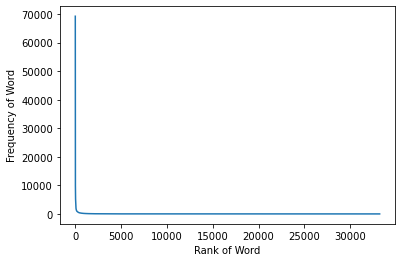

In [53]:
importlib.reload(lab1)
lab1.plot_zipf(freqs)

## Exercise 4: Type-to-Token Ratio (TTR)

Another way of measuring the richenss of vocabulary is by looking at the type-token distribution of words in a language. Word types are unique words in a corpus, whereas the tokens are the words in a corpus with repetition. And so, a sentence such as "I am taking this class because I love taking on challenges" has 11 tokens, but 9 types since the words "I" and "taking" are repeated twice. Accordingly, Type-to-Token Ratio (TTR) is the ratio of types to tokens, and the higher it is, the less words are repeated, and the richer is the language.

**Total points: 15 points**

a. In this exercise we will be exploring, for every language, the amount of "types" explored as we explore larger portions of the corpus, or tokens. We will be considering the Universal Declaration of Human Rights in 4 languages. Particularly, we will be plotting the amount of types explored per language as we explore 100 more tokens. For this exercise, complete the following function "get_TTRs" which takes in as an input a predefined set of languages, and returns as an output the dictionary TTR, which has a language as the key, and the value as a list showing the count of types as we explore 100 tokens, 200 tokens, 300 tokens, up until 1300 tokens of the respective corpus. Accordingly, each list in the dictionary should be made of 13 data points. Do not forget to lowercase, but you do not need to perform tokenization as the corpora now are actually a list of words instead of one string.  (15 points)

In [54]:
from nltk.corpus import udhr
languages = ['Italian-Latin1', 'English-Latin1', 'German_Deutsch-Latin1', 'Finnish_Suomi-Latin1']

In [55]:
importlib.reload(lab1)
TTRs = lab1.get_TTRs(languages)
print(TTRs)

{'Italian-Latin1': [64, 110, 143, 179, 221, 260, 286, 326, 355, 386, 412, 426, 451], 'English-Latin1': [57, 99, 133, 167, 207, 231, 262, 292, 318, 339, 358, 381, 403], 'German_Deutsch-Latin1': [63, 113, 155, 204, 254, 284, 324, 358, 388, 418, 446, 475, 504], 'Finnish_Suomi-Latin1': [74, 137, 192, 252, 303, 356, 406, 459, 491, 537, 586, 631, 675]}


In [56]:
### BEGIN HIDDEN TESTS
assert TTRs['Italian-Latin1'] == [64, 110, 143, 179, 221, 260, 286, 326, 355, 386, 412, 426, 451]
assert TTRs['English-Latin1'] == [57, 99, 133, 167, 207, 231, 262, 292, 318, 339, 358, 381, 403]
assert TTRs['German_Deutsch-Latin1'] == [63, 113, 155, 204, 254, 284, 324, 358, 388, 418, 446, 475, 504]
assert TTRs['Finnish_Suomi-Latin1'] == [74, 137, 192, 252, 303, 356, 406, 459, 491, 537, 586, 631, 675]
### END HIDDEN TESTS

b. Next, plot a line graph (one line for every language, four lines in total) that shows the count of types discovered on the y-axis and the amount of tokens in the corpus discovered on the x-axis, in increments of 100 tokens, up to 1300. (Ungraded)

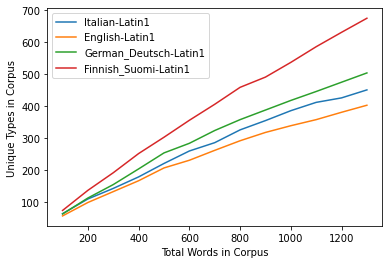

In [57]:
import matplotlib.pyplot as plt
importlib.reload(lab1)
lab1.plot_TTRs(TTRs)

c. Which language has the highest TTR? What could be driving the TTR? Share your thoughts in the textbox below: (Ungraded)

**Share your thoughts here:** 